<h1 align = center> 100 Days of Machine Learning - Day 4

100 days of machine learning is a tech challenge where the participants spend 100 continuous days studying, learning and coding machine learning concepts. It involves dedicating a certain amount of time each day to engage in ML-related activities, such as reading books, watching tutorials, completing online courses, working on projects, or participating in coding exercises. The goal is to develop a consistent learning habit and make significant progress in ML skills over the course of 100 days.

# Table of Contents

1. Gradient Descent
2. Learning Rate

# Gradient Descent


Gradient Descent or the gradient descent function is an optimization algorithm that is used to minimize the value of a function, typically a loss function in a machine learning environment. This is achieved by the algorithm adjusting various parameters inside the model and helps to "train" the model.

Gradient descent is called so because it does a stepwise decent on the cost function gradient towards the local or global minima.

Gradient descent is not a single algorithm, it is a collection of algorithms that are used in different scenarios variatingly just like the cost function, but the basic principle of all gradient descent approaches is the same.

Here's how gradient descent works in general : 

 - Initialize the parameters of the model with some values.
 - Calculate gradient loss.
 - Update the current parameters by subtracting a small amount or a fractional amount of the gradient based on the learning rate.
 - Repeat till a minima or convergence is reached or a specific number of iterations takes place. 

$$ 

w = w - \alpha \frac{{d}}{{dx}} J(w,b)

where α is the learning rate in the equation, J(w,b) is the cost function of f(x)


for SLR, this can be interpreted as : 

$$ \frac{1}{n} = \sum (f_{(w,b)}(x^{(i)}) - y^{(i)})(x^{(i)})

## Learning Rate (α)

Learning Rate of an ML model is a hyperparameter which controls the step size of gradient descent when updating the parameters of the model. It controls the rate at which the parameters are adjusted from the calculated gradients of the loss function.

Setting an optimal learning rate is crucial, since different learning rates can yield different outcomes : 

 - If α is too high, the algorithm might overshoot the local minima and fail to properly converge or keep oscillating outside the local minima.
 - If α is too low, the gradient descent step will be too small and the algorithm will converge very slowly and result in a very high amount of processing time to find the local minima and optimize the parameters.

The learning rate of the model can be both fixed and dynamic. In simpler models like LR, the value of α is kept fixed. 

Even when α is fixed, the gradient of the cost function will allow for dynamic steps to be taken during gradient descent. This is because as we travel down the slope through multiple steps, the value of the gradient itself becomes small, resulting in a smaller value of $$ \alpha \frac{d}{dw} J(w,b) $$


This leads to the step size getting smaller as we approach the local minima.

# Implementing Simple Linear Regression

It is finally time to do some SLR implementation!

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = pd.read_csv('data/car_prices_dataset.csv')

In [80]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [81]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Let's look at the horsepower vs price plot for this data

<Axes: xlabel='horsepower', ylabel='price'>

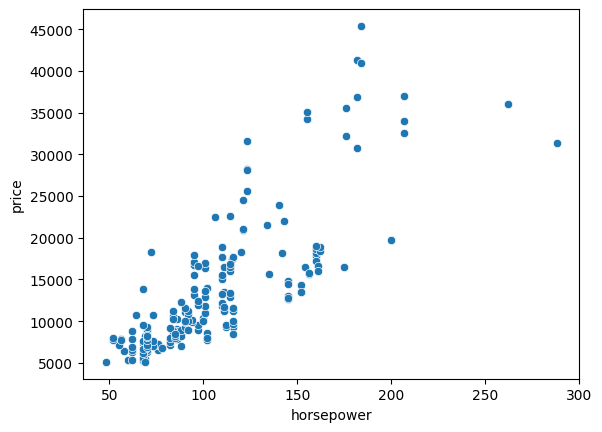

In [82]:
sns.scatterplot(data = data, x = "horsepower", y = "price")

<Axes: xlabel='curbweight', ylabel='price'>

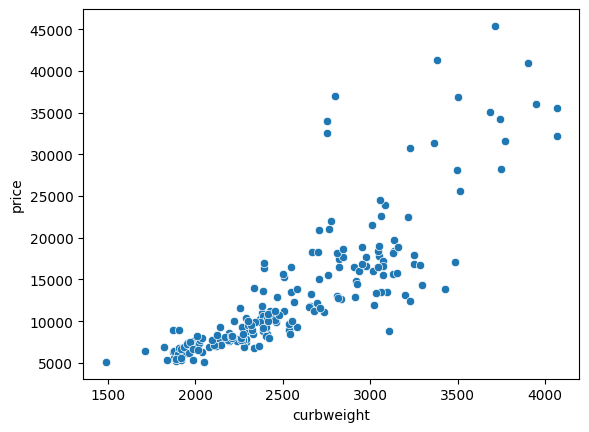

In [83]:
sns.scatterplot(data = data, x = "curbweight", y = "price")

Both curbweight and horsepower showed high positive correlation in the correlation matrix on [Day 2](/100daysofml/Day%202/Day%202.ipynb)

Let's now import the linear regression model from scikitlearn

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regress1 = LinearRegression()
regress2 = LinearRegression()

In [86]:
horsepower = np.array(data.horsepower).reshape(-1,1)
price = np.array(data.price)
curbweight = np.array(data.curbweight).reshape(-1,1)

In [87]:
regress1.fit(horsepower,price)
regress2.fit(curbweight,price)

LinearRegression()

<Axes: xlabel='horsepower', ylabel='price'>

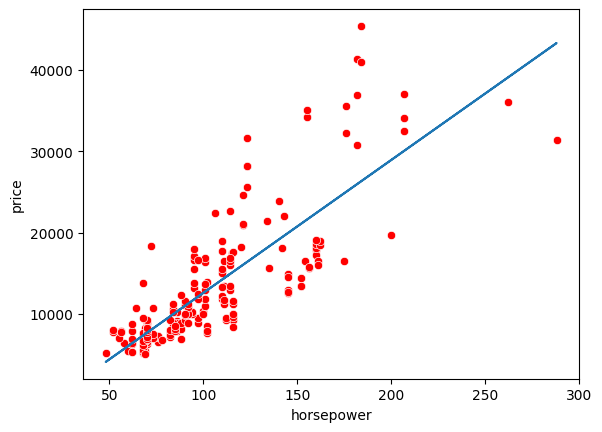

In [88]:
from sklearn.metrics import r2_score, mean_squared_error
pred1 = regress1.predict(horsepower)
mse1 = mean_squared_error(price, pred1)
r2_1 = r2_score(price, pred1)
plt.plot(horsepower, pred1)
sns.scatterplot(data = data, x = "horsepower", y = "price", color = "red")

In [91]:
print("MSE : ", mse1)
print("R-Squared Error", r2_1)
print("B or Y intercept : ", regress1.intercept_)
print("coeffecient or slope: ", regress1.coef_)

MSE :  22032509.70230993
R-Squared Error 0.653088356490231
B or Y intercept :  -3721.7614943227636
coeffecient or slope:  [163.26306097]


<Axes: xlabel='curbweight', ylabel='price'>

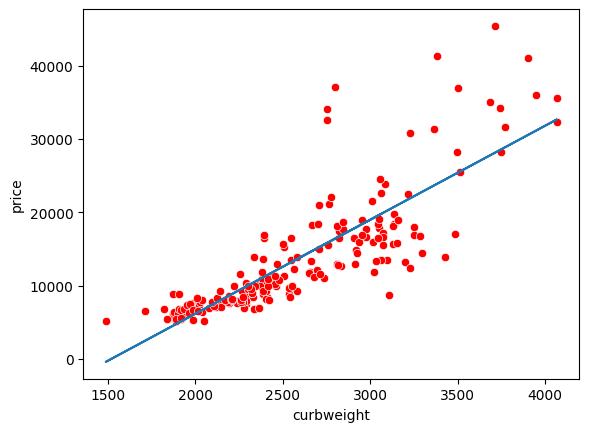

In [89]:
from sklearn.metrics import r2_score, mean_squared_error
pred2 = regress2.predict(curbweight)
mse2 = mean_squared_error(price, pred2)
r2_2 = r2_score(price, pred2)
plt.plot(curbweight, pred2)
sns.scatterplot(data = data, x = "curbweight", y = "price", color = "red")

In [92]:
print("MSE : ", mse2)
print("R-Squared Error", r2_2)
print("B or Y intercept : ", regress2.intercept_)
print("coeffecient or slope: ", regress2.coef_)

MSE :  19197030.08716766
R-Squared Error 0.6977342414446954
B or Y intercept :  -19475.862380320832
coeffecient or slope:  [12.81617255]


We see that the curbweight is a better feature to fit the line than horsepower. In the next iteration, we will look at how to implement multiple linear regression and do feature selection.